# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [50]:
def read_data(path="./hw8_data/boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [21]:
class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        rows, _ = X.shape
        X1 = np.hstack((np.ones((rows, 1)), X))
        self.beta = np.dot(np.linalg.inv(np.dot(np.transpose(X1), X1)), np.dot(np.transpose(X1), y))
    
    def predict(self, X):
        rows, _ = X.shape
        X1 = np.hstack((np.ones((rows, 1)), X))
        y = np.dot(X1, self.beta)
        return y

In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [24]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.00954952200527571


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [75]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        rows, cols = X.shape
        self.beta = np.zeros(cols + 1)
        X1 = np.hstack((np.ones((rows, 1)), X))
        
        for _ in range(self.iterations):
            h = np.dot(X1, self.beta)
            e = h - y
            gradient = X1.T.dot(e) / rows + self.l * np.sign(self.beta)
            self.beta = self.beta - self.alpha * gradient       

    def predict(self, X):
        rows, _ = X.shape
        X1 = np.hstack((np.ones((rows, 1)), X))
        y = np.dot(X1, self.beta)
        return y

In [48]:
def build_plot(X_train, y_train, X_test, y_test):
    l_test = np.linspace(0, 1, 10)
    m = []
    for l in l_test:
        regr = GradientLR(alpha=0.1, iterations=10000, l=l)
        regr.fit(X_train, y_train)
        m.append(mse(y_test, regr.predict(X_test)))
    plt.plot(l_test, m)

In [27]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.00990880579462549


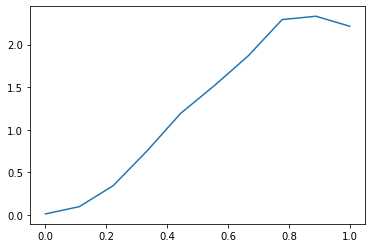

In [49]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
X, y = read_data('./hw8_data/cancer.csv')
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [83]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

1.2049266284506514e-05


1.1965885854701449e-05


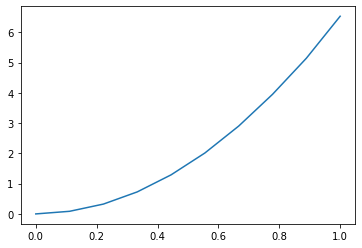

In [86]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

In [100]:
X, y = read_data('./hw8_data/spam.csv')
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - np.mean(y)) / np.std(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [101]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.4305106364752112


0.4304990826750659


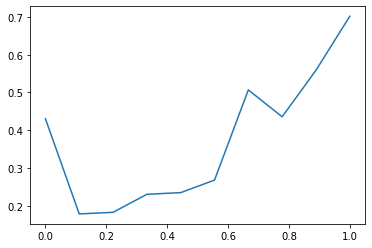

In [102]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)